In [15]:
from IPython.display import display
from os import path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()

# local modules
from visualizations import plotGroupAverageDistribution, _select_avg_question_type_scores
from utils import load_data

cf.set_config_file(offline=False, world_readable=True)

In [2]:
data = load_data()

In [17]:
data.head(2)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706


In [6]:
mean_scores_df = _select_avg_question_type_scores(data)
display(mean_scores_df.head())
print(mean_scores_df.shape)

,EXT_mean,EST_mean,AGR_mean,CSN_mean,OPN_mean
0,3.0,2.4,3.1,3.2,3.3
1,3.4,2.1,3.2,3.1,2.7
2,2.9,2.6,2.8,2.8,3.1
3,2.6,2.7,3.2,2.7,3.1
4,3.5,2.3,3.0,3.2,3.6


(1015341, 5)


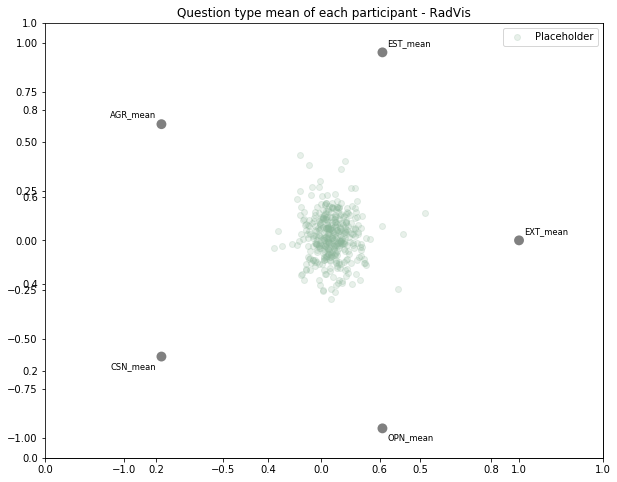

In [12]:
plotGroupAverageDistribution(data.iloc[:400],True, filename=path.join('media','participants_avg_qtype_radvis.png'), n=500)

In [14]:
pd.isna(data).sum().head(15)

EXT1     1783
EXT2     1783
EXT3     1783
EXT4     1783
EXT5     1783
EXT6     1783
EXT7     1783
EXT8     1783
EXT9     1783
EXT10    1783
EST1     1783
EST2     1783
EST3     1783
EST4     1783
EST5     1783
dtype: int64

# Kmeans

## Plan

Kmeans clustering!

Let's go for kmeans clustering, plan:
1. Choose optimal k using within metric and elbow plot
2. fit kmeans and make a few plots with the clusters:
    1. radvis
    2. parallel coordinates
3. fit pca and analyse components
    1. if pca makes sense, repeat steps 1 and 2 using top two components.

### 1. Choose optimal k using Withiness metric and elbow plot

In [ ]:
for n_clusters in range(2,30):
    kmeans = KMeans(n_clusters)
    kmeans.fit()